In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Bondora_raw.csv')

In [ ]:
df.shape

(134529, 112)

In [ ]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [ ]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

Data Preprocessing

Percentage of Missing Values

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.374988717249494


In [ ]:
# Finding columns with a mean null values percentage above 40%
DropColList = df.columns[(df.isnull().mean()*100) >= 40].tolist()

In [ ]:
# Displying columns with a mean null values percentage above 40%
df[DropColList].isnull().mean()*100

ContractEndDate                        56.155922
NrOfDependants                         73.537304
EmploymentPosition                     73.173070
WorkExperience                         72.851950
PlannedPrincipalTillDate               59.518765
CurrentDebtDaysPrimary                 63.934914
DebtOccuredOn                          63.934914
CurrentDebtDaysSecondary               61.160791
DebtOccuredOnForSecondary              61.160791
DefaultDate                            68.099815
PlannedPrincipalPostDefault            68.099815
PlannedInterestPostDefault             68.099815
EAD1                                   68.099815
EAD2                                   68.099815
PrincipalRecovery                      68.099815
InterestRecovery                       68.099815
RecoveryStage                          42.584127
EL_V0                                  96.603706
Rating_V0                              96.603706
EL_V1                                  90.394636
Rating_V1           

In [ ]:
# Number of these columns
len(df.columns[(df.isnull().mean()*100) >= 40])

36

In [ ]:
# Now we can remove columns having more than 40% missing values
df.drop(columns= DropColList, axis= 1, inplace=True)

In [ ]:
df.shape

(134529, 76)

In [ ]:
df['NrOfScheduledPayments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NrOfScheduledPayments, dtype: float64

In [ ]:
df.drop(columns=['LoanId', 'LoanNumber', 'UserName', 'DateOfBirth', 'County', 'City'], inplace = True)

In [ ]:
df.drop(columns=['IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
                 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther'], inplace = True)

In [ ]:
df.drop(columns=['ReportAsOfEOD', 'ListedOnUTC', 'BiddingStartedOn', 'LoanApplicationStartedDate', 'LastPaymentOn',
                 'MonthlyPaymentDay','LoanDate', 'FirstPaymentDate', 'MaturityDate_Original','MaturityDate_Last'],
        inplace = True)

In [ ]:
df.drop(columns=['NextPaymentNr', 'NrOfScheduledPayments', 'ApplicationSignedHour', 'ApplicationSignedWeekday',
                 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'ExpectedLoss','LossGivenDefault',
                'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince',
                'ModelVersion', 'WorseLateCategory'], inplace = True)

In [ ]:
df.shape

(134529, 39)

Creating Target Variable

In [ ]:
df["DefaultDate"] = pd.read_csv('/content/drive/MyDrive/Bondora_raw.csv',low_memory=False).DefaultDate

In [ ]:
df.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [ ]:
df = df[df.Status != 'Current']

In [ ]:
df.Status.value_counts()

Late      45772
Repaid    31622
Name: Status, dtype: int64

In [ ]:
df.shape

(77394, 40)

In [ ]:
df.DefaultDate.fillna('NoDefault', inplace = True)

In [ ]:
# Replace any Date by Defalut
for i in range(len(df.DefaultDate.values)):
    if df.DefaultDate.values[i] != 'NoDefault':
        df.DefaultDate.values[i] = 'Default'

In [ ]:
df.DefaultDate.value_counts()

Default      42794
NoDefault    34600
Name: DefaultDate, dtype: int64

In [ ]:
# let's drop the status columns
df.drop(columns=['Status'], inplace = True)

In [ ]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultDate
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NoDefault
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NoDefault
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NoDefault
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


In [ ]:
# Rename DefaultDate column to LoanStatus
df.rename(columns={'DefaultDate':'LoanStatus'}, inplace = True)

In [ ]:
df.LoanStatus.value_counts()

Default      42794
NoDefault    34600
Name: LoanStatus, dtype: int64

In [30]:
df.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                 float64
MaritalStatus                             float64
EmploymentStatus                          float64
EmploymentDurationCurrentEmployer          object
OccupationArea                            float64


In [31]:
df.VerificationType.fillna('Not Set', inplace = True)

In [32]:
# convert from float type to string first
df['VerificationType'] = df['VerificationType'].astype(object)

for i in range(len(df.VerificationType.values)):
    df.VerificationType.values[i] = str(df.VerificationType.values[i])

In [33]:
df.VerificationType.dtype, type(df.VerificationType.values[0])

(dtype('O'), str)

In [34]:
df.VerificationType = df.VerificationType.str.replace('0.0', 'Not Set')
df.VerificationType = df.VerificationType.str.replace('1.0', 'Income unverified')
df.VerificationType = df.VerificationType.str.replace('2.0', 'Income unverified,cross-referenced by phone')
df.VerificationType = df.VerificationType.str.replace('3.0', 'Income verified')
df.VerificationType = df.VerificationType.str.replace('4.0', 'Income and expenses verified')

In [35]:
df.VerificationType.value_counts()

Income and expenses verified                   41428
Income unverified                              25626
Income verified                                 8460
Income unverified,cross-referenced by phone     1827
Not Set                                           53
Name: VerificationType, dtype: int64

In [36]:
df.Gender.value_counts()

0.0    50697
1.0    20927
2.0     5725
Name: Gender, dtype: int64

In [37]:
# Replace Null values by Undefined
df.Gender.fillna('Undefined', inplace = True)

In [38]:
# Convert from int types to string first
df['Gender'] = df['Gender'].astype(object)

for i in range(len(df.Gender.values)):
    df.Gender.values[i] = str(df.Gender.values[i])

In [39]:
df.Gender.dtype, type(df.Gender.values[0])

(dtype('O'), str)

In [40]:
df.Gender = df.Gender.str.replace('0.0', 'Male')
df.Gender = df.Gender.str.replace('1.0', 'Female')
df.Gender = df.Gender.str.replace('2.0', 'Undefined')

In [41]:
df.Gender.value_counts()

Male         50697
Female       20927
Undefined     5770
Name: Gender, dtype: int64

### Exploratory Data Analysis (EDA):

In [42]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,LoanStatus
0,0,0,115.0410,True,"Income unverified,cross-referenced by phone",1,61,Female,EE,319.5582,115.0408,30.0,12,NaN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NoDefault
1,0,0,140.6057,False,"Income unverified,cross-referenced by phone",1,48,Female,EE,191.7349,140.6057,25.0,1,NaN,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NoDefault
2,0,0,319.5580,True,"Income unverified,cross-referenced by phone",1,58,Female,EE,319.5582,319.5409,25.0,20,NaN,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,Default
3,0,0,57.5205,True,"Income unverified,cross-referenced by phone",1,23,Female,EE,127.8233,57.5205,45.0,15,NaN,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NoDefault
4,0,0,319.5582,True,"Income unverified,cross-referenced by phone",1,25,Female,EE,319.5582,319.5436,30.0,12,NaN,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,Default


Categorical features distribution :

In [43]:
df.select_dtypes([object, bool]).columns

Index(['NewCreditCustomer', 'VerificationType', 'Gender', 'Country',
       'EmploymentDurationCurrentEmployer', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'LoanStatus'],
      dtype='object')

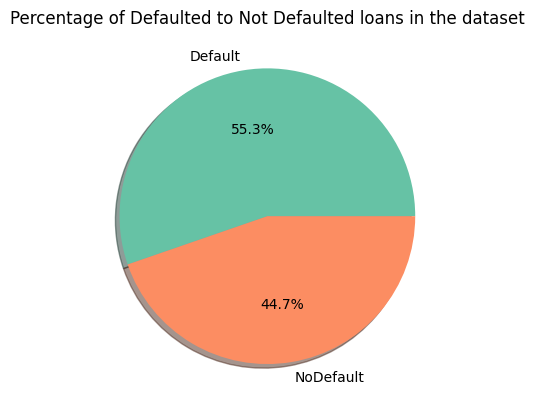

In [46]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')

# plotting data on chart
plt.pie(df.LoanStatus.value_counts().values, labels = df.LoanStatus.value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")

# displaying chart
plt.show()

Residency of the Defaulters :

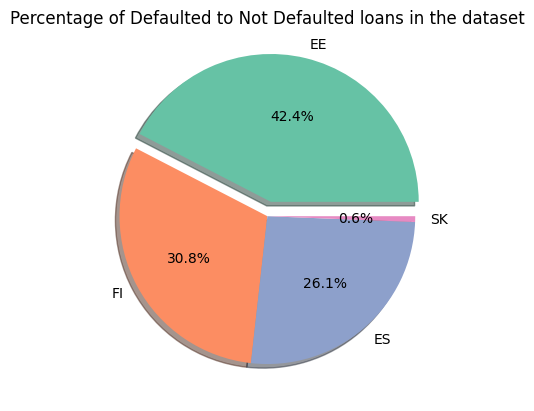

In [47]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')

# plotting data on chart
plt.pie(df.Country[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.Country[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.1, 0, 0,0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Defaulted to Not Defaulted loans in the dataset")

# displaying chart
plt.show()

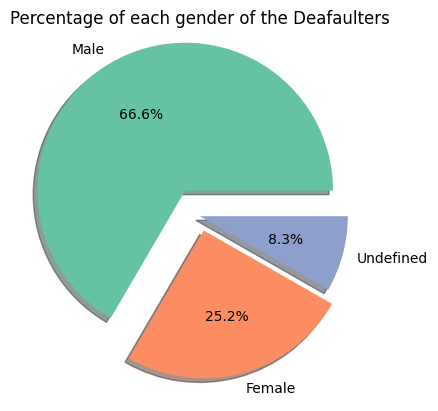

In [48]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')

# plotting data on chart
plt.pie(df.Gender[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.Gender[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0.2, 0.1, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of each gender of the Deafaulters")

# displaying chart
plt.show()

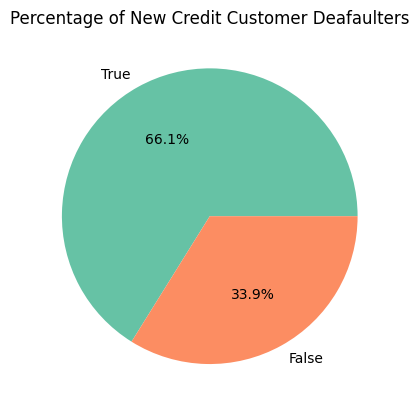

In [49]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')

# plotting data on chart
plt.pie(df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().values,
        labels = df.NewCreditCustomer[df.LoanStatus == 'Default'].value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = False)
plt.title("Percentage of New Credit Customer Deafaulters")

# displaying chart
plt.show()

Language Code Distribution of the Defaulters :

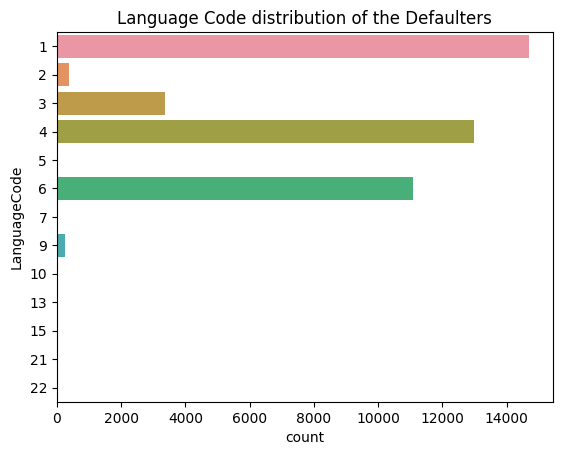

In [50]:
sns.countplot(y = df.LanguageCode[df.LoanStatus == 'Default'])
plt.title('Language Code distribution of the Defaulters');

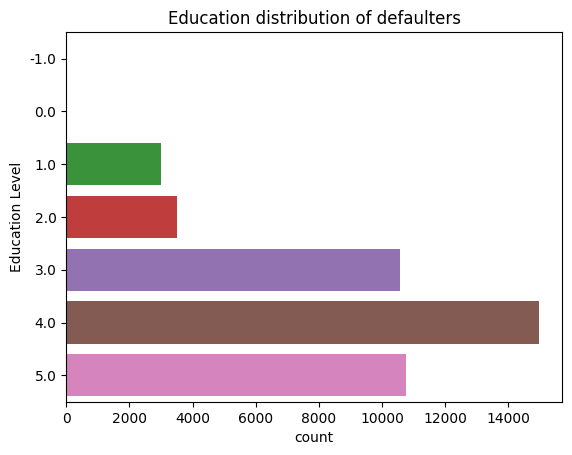

In [51]:
sns.countplot(data=df, y = df.Education[df.LoanStatus == 'Default'])
plt.title('Education distribution of defaulters')
plt.ylabel('Education Level');

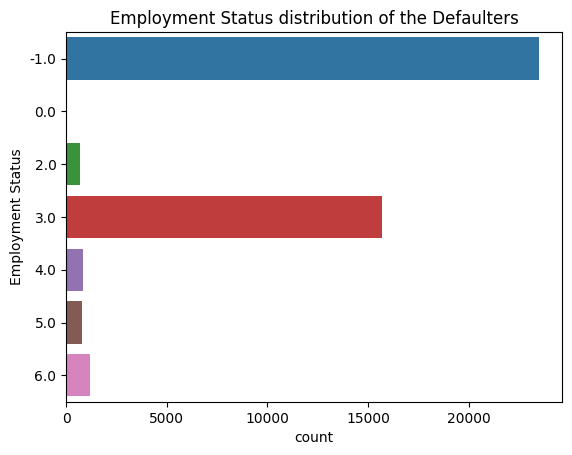

In [52]:
sns.countplot(data=df, y = df.EmploymentStatus[df.LoanStatus == 'Default'])
plt.title('Employment Status distribution of the Defaulters')
plt.ylabel('Employment Status');

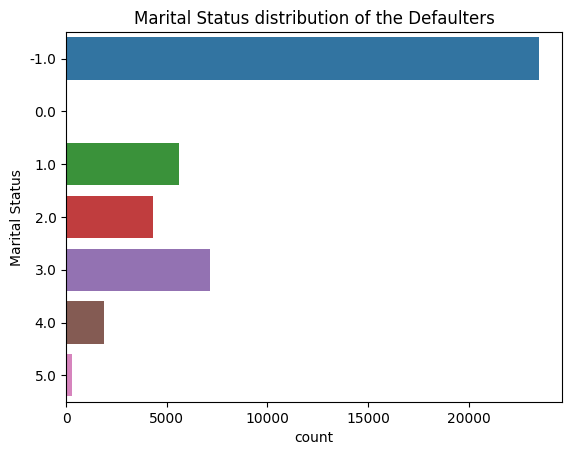

In [53]:
sns.countplot(data=df, y = df.MaritalStatus[df.LoanStatus == 'Default'])
plt.title('Marital Status distribution of the Defaulters')
plt.ylabel('Marital Status');

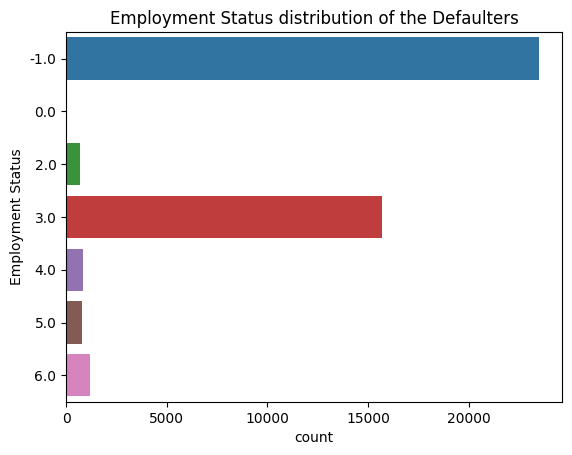

In [59]:
sns.countplot(data=df, y = df.EmploymentStatus[df.LoanStatus == 'Default'])
plt.title('Employment Status distribution of the Defaulters')
plt.ylabel('Employment Status');

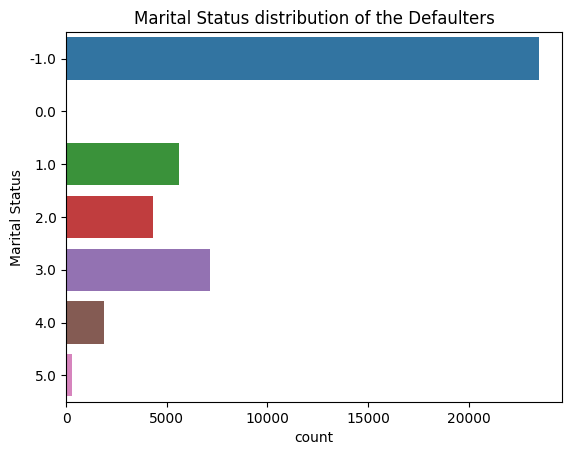

In [61]:
sns.countplot(data=df, y = df.MaritalStatus[df.LoanStatus == 'Default'])
plt.title('Marital Status distribution of the Defaulters')
plt.ylabel('Marital Status');

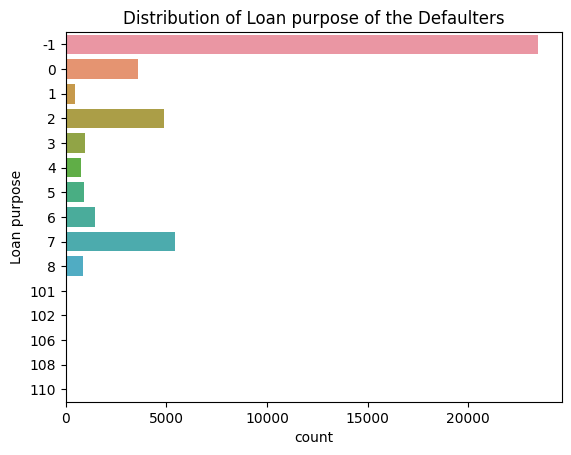

In [62]:
sns.countplot(data=df, y = df.UseOfLoan[df.LoanStatus == 'Default'])
plt.title('Distribution of Loan purpose of the Defaulters')
plt.ylabel('Loan purpose');

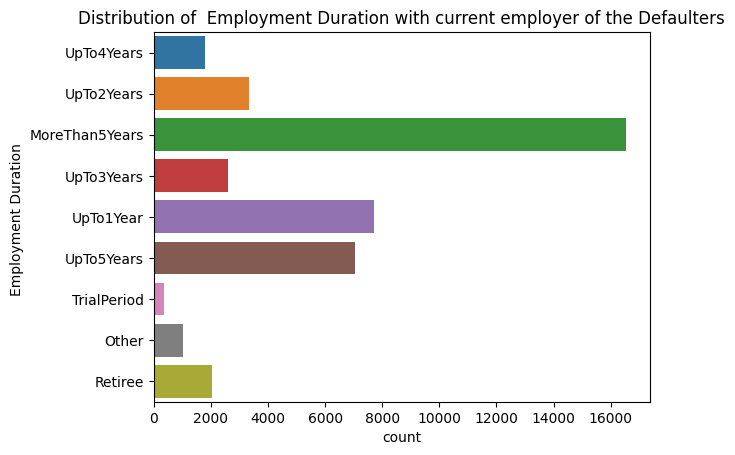

In [63]:
sns.countplot(data=df, y = df.EmploymentDurationCurrentEmployer[df.LoanStatus == 'Default'])
plt.title('Distribution of  Employment Duration with current employer of the Defaulters')
plt.ylabel('Employment Duration ');